# 문제 정의
    Q. 10개의 아울렛 매장에서 1,500여 개의 제품에 대한 판매 데이터를 수집했다. 예측 모델을 만들고 아울렛 특정 매장에서 각 제품의 판매금액을 예측하시오
- 평가 기준을 RSME로 평가
- label(target)은 판매금액(Item_Outlet_Sale)
- 제출 파일은 예측값만 result.csv 파일로 생성해 제출(컬럼명 : pred, 1개)


In [1]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [28]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [29]:
train.shape, test.shape

((6818, 12), (1705, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,NCR06,12.500,Low Fat,0.006760,Household,42.8112,OUT013,1987,High,Tier 3,Supermarket Type1,639.1680
1,FDW11,12.600,Low Fat,0.048741,Breads,60.4194,OUT013,1987,High,Tier 3,Supermarket Type1,990.7104
2,FDH32,12.800,Low Fat,0.075997,Fruits and Vegetables,97.1410,OUT013,1987,High,Tier 3,Supermarket Type1,2799.6890
3,FDL52,6.635,Regular,0.046351,Frozen Foods,37.4506,OUT017,2007,NaN,Tier 2,Supermarket Type1,1176.4686
4,FDO09,13.500,Regular,0.125170,Snack Foods,261.4910,OUT013,1987,High,Tier 3,Supermarket Type1,3418.8830


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6818 non-null   object 
 1   Item_Weight                5656 non-null   float64
 2   Item_Fat_Content           6818 non-null   object 
 3   Item_Visibility            6818 non-null   float64
 4   Item_Type                  6818 non-null   object 
 5   Item_MRP                   6818 non-null   float64
 6   Outlet_Identifier          6818 non-null   object 
 7   Outlet_Establishment_Year  6818 non-null   int64  
 8   Outlet_Size                4878 non-null   object 
 9   Outlet_Location_Type       6818 non-null   object 
 10  Outlet_Type                6818 non-null   object 
 11  Item_Outlet_Sales          6818 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [7]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5656.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,12.872703,0.066121,140.419533,1997.885890,2190.941459
std,4.651034,0.051383,62.067861,8.339795,1706.131256
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026914,93.610050,1987.000000,836.577700
50%,12.600000,0.053799,142.448300,1999.000000,1806.648300
75%,17.000000,0.095273,185.060150,2004.000000,3115.944000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##### 비대칭도를 대략적으로 추측하는법
    median(50%) > mean 인 경우 왼쪽 꼬리가 긴 분포 : Negative Skew
    median(50%) < mean 인 경우 오른쪽 꼬리가 긴 분포 : Positive Skew

<Axes: >

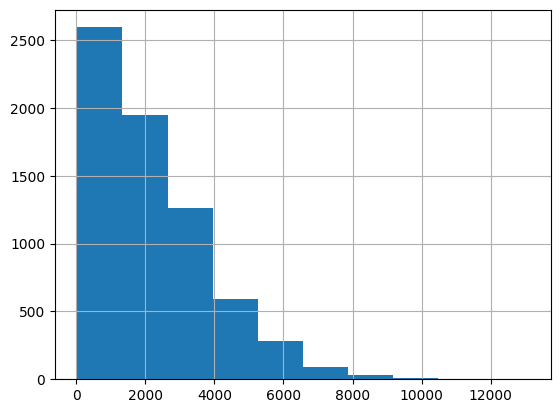

In [8]:
# 시험에서는 시각화 출력 사용 불가
train['Item_Outlet_Sales'].hist()

In [9]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,6818,6818,6818,6818,4878,6818,6818
unique,1554,5,16,10,3,3,4
top,FDW26,Low Fat,Snack Foods,OUT046,Medium,Tier 3,Supermarket Type1
freq,9,4092,963,763,2228,2664,4474


In [10]:
test.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,1705,1705,1705,1705,1235,1705,1705
unique,1077,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,4,997,272,207,565,686,1103


In [11]:
train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1162
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,1940
Outlet_Location_Type,0


In [12]:
test.isnull().sum()

,0
Item_Identifier,0
Item_Weight,301
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,470
Outlet_Location_Type,0


#### 데이터 전처리

- 인코딩 처리

      object 컬럼 선택이 필요하다. 컬럼명 중 object 컬럼만 리스트로 만드는 방법과 직접 object 컬럼 리스트를 만드는 방법이 있다.

In [13]:
list(train.columns[train.dtypes==object])

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [30]:
cols = ['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']



In [31]:
cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [32]:
target = train.pop('Item_Outlet_Sales')

In [33]:
print(train.shape,test.shape)

(6818, 11) (1705, 11)


In [34]:
df = pd.concat([train,test])
print(df.shape)

(8523, 11)


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cols:
  df[col] = le.fit_transform(df[col])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,NCR06,12.500,1,0.006760,9,42.8112,1,1987,0,2,1
1,FDW11,12.600,1,0.048741,1,60.4194,1,1987,0,2,1
2,FDH32,12.800,1,0.075997,6,97.1410,1,1987,0,2,1
3,FDL52,6.635,2,0.046351,5,37.4506,2,2007,3,1,1
4,FDO09,13.500,2,0.125170,13,261.4910,1,1987,0,2,1


In [37]:
train = df.iloc[:len(train)].copy()
test = df.iloc[len(train):].copy()

train.shape,test.shape

((6818, 11), (1705, 11))

### 결측지 제거
    Item_Weight : 1162
    Outlet_Size : 1940

In [39]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].min())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

test['Item_Weight'] = test['Item_Weight'].fillna(train['Item_Weight'].min())
test['Outlet_Size'] = test['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

In [41]:
print(train.shape,test.shape)
train.drop('Item_Identifier',axis=1,inplace=True)
test.drop('Item_Identifier',axis=1,inplace=True)
print(train.shape,test.shape)

(6818, 11) (1705, 11)
(6818, 10) (1705, 10)


#### 검증 데이터 나누기
1. X 데이터에서 타깃 변수 제외
        학습 데이터(X)에서 타깃 변수(y)를 포함시키지 않아야 한다.
        -> 타깃 변수를 포함시키게 되면 모델은 이미 정답을 알고 있게 된다.
2. y 데이터는 시리즈 형태로
        타깃 데이터(y)는 데이터프레임에서 단일 컬럼을 선택해 시리즈 형태로 있어야 한다.
3. rando_state 고정
        데이터를 나눌때 random_state값을 설정해 고정시키면 코드를 실행할때마다 동일한 방식으로 데이터가 나눠진다.
        -> 모델 성능을 일관되게 평가하고, 다른 조건에서 실험했을 때 결과를 재현할 수 있다.

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(train,target,test_size=0.2,random_state = 0)
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((5454, 10), (1364, 10), (5454,), (1364,))

#### 머신러닝 학습 및 평가
    RSME가 어려우면 MAE, MSE. R^2(결정계수)로 평가를 진행한다.
    MSE,MAE,RMSE는 낮을수록 좋고 R^2은 1에 가까울수록 좋다.

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def rmse(y_val,y_pred):
  return mean_squared_error(y_val,y_pred)**0.5

#### 선형회귀(Linear Regression)
    선형회귀(Linear Regression) 모델은 random_state 값이 없다.
    성능이 어느 정도 인지 가늠하기 어렵다. 따라서 첫번쨰(베이스라인) 모델의 점수를 기준으로 하면 된다.
    즉 RSME 결과값보다 더 좋은 성능을 내기 위해 노력하면 되는 것이다.

In [44]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_val)

result = mean_squared_error(y_val,y_pred)
print('MSE:',result)

result = mean_absolute_error(y_val,y_pred)
print('MAE:',result)

result = r2_score(y_val,y_pred)
print('R2:',result)

result = rmse(y_val,y_pred)
print('RMSE:',result)

MSE: 1282923.0729833888
MAE: 865.1968401416275
R2: 0.5058168396924845
RMSE: 1132.6619411737065


#### 랜덤 포레스트
    회귀를 사용시에는 RandomForestRegression 사용한다. Random_state 고정한다(=0)

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_val)


result = mean_squared_error(y_val,y_pred)
print('MSE:',result)

result = mean_absolute_error(y_val,y_pred)
print('MAE:',result)

result = r2_score(y_val,y_pred)
print('R2:',result)

result = rmse(y_val,y_pred)
print('RMSE:',result)


MSE: 1101802.8117346708
MAE: 747.2971172067448
R2: 0.5755845326933362
RMSE: 1049.6679530854844


#### LightGBM
    회귀를 사용시에는 LGBMRegressor 사용한다. Random_state = 0 / verbose=1 고정한다.

In [52]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=0,verbose=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)


result = mean_squared_error(y_val,y_pred)
print('MSE:',result)

result = mean_absolute_error(y_val,y_pred)
print('MAE:',result)

result = r2_score(y_val,y_pred)
print('R2:',result)

result = rmse(y_val,y_pred)
print('RMSE:',result)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 5454, number of used features: 10
[LightGBM] [Info] Start training from score 2202.546849
MSE: 1115654.3482227568
MAE: 736.6367966578568
R2: 0.5702489079618556
RMSE: 1056.2454015155554


#### 예측 및 결과 파일 생성
    test 데이터를 예측한다.

In [53]:
pred = model.predict(test)
pred

array([1226.50504175,  830.18920951, 1788.76644309, ..., 3666.34876099,
        990.65125496, 1224.1960178 ])

In [55]:
submit = pd.DataFrame({'pred':pred})
submit.to_csv("result.csv",index= False)

In [56]:
pd.read_csv("result.csv")

,pred
0,1226.505042
1,830.189210
2,1788.766443
3,1644.510784
4,2831.798098
...,...
1700,285.648607
1701,481.591492
1702,3666.348761
1703,990.651255
